# How to Develop Regression Models in Python

September 13, 2025

Objetivo:

* Estimar una Regression lineal.

## Setup
#### Load Python libaries, etc.

In [1]:
#
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 500)  # Show up to 500 columns
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from scipy import stats
import plotly.express as px

#
import warnings
warnings.filterwarnings('ignore')

## Regression

El objetivo es econtrar los valores de $\hat{\boldsymbol{\beta}}$ que resulta de:
$$\hat{\boldsymbol{\beta}} = \min_{\boldsymbol{\beta}} \left[ \sum_{i = 1}^n (y_i - \mathbf{X}_i \boldsymbol{\beta})^2  \right]$$


## Lectura de Data

Los datos utilizados corresponden a precios de venta de inmuebles en la CDMX recolectados de la web de Inmuebles 24 en mayo de 2020.

In [4]:
# Download the dataset from GitHub
#!wget https://raw.githubusercontent.com/benjov/Multivariante-II-2025-Tec/refs/heads/main/01%20Intro/01%20Aplicaci%C3%B3n%20de%20modelos%20de%20regresi%C3%B3n%20lineal/Ventas.csv

# Load the data into a pandas DataFrame
Venta = pd.read_csv('Ventas.csv')

Venta.tail()

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),propiedad,entidad,Moneda,Monto,Iniciales,lat,lng,calle,numero,colonia,ciudad,CP,formatad,Monto1
45319,Cumbres de Santa Fe Casa en Venta,"Avenida de los Poetas, Santa Fe, Alvaro Obregón","Gran proyecto de casa en cumbres, acabados aaa...",/propiedades/cumbres-de-santa-fe-casa-en-venta...,"USD 2,850,000",venta,4.0,4.0,630.0,720.0,Casa en Condominio,CDMX,USD,2850000,AFM,19.351844,-99.259244,Avenida de los Poetas,NaN,NaN,Ciudad de México,NaN,"Av. de los Poetas, Ciudad de México, CDMX, Mexico",64695000.0
45320,Casa Club de Golf Bosques de Santa Fe/ Proyect...,"CLUB DE GOLF BOSQUES DE SANTA FE, Club de Golf...",En calle cerrada magnífica residencia de los a...,/propiedades/casa-club-de-golf-bosques-de-sant...,"USD 4,300,000",venta,3.0,3.0,760.0,1050.0,Casa en Condominio,CDMX,USD,4300000,AFM,19.387671,-99.250992,Paseo de los Tamarindos,400-B,Bosques de las Lomas,Ciudad de México,5120.0,"Piso 28, P.º de los Tamarindos 400-B, Bosques ...",97610000.0
45321,Santa Fe La Loma,"Bernardo Quintana No. 75 Patios I, Lomas de ...","Casa en la Loma de Santa Fe Los Patios I, Proy...",/propiedades/santa-fe-la-loma-54955327.html,"USD 1,075,000",venta,3.0,3.0,380.0,380.0,Casa en Condominio,CDMX,USD,1075000,AFM,19.374180,-99.245266,Avenida Bernardo Quintana,75,La Loma,Ciudad de México,1260.0,"Av Bernardo Quintana 75, Santa Fe, La Loma, Ál...",24402500.0
45322,Exclusiva Residencia Rancho San Francisco,"RANCHO SAN FRANCISCO , Rancho San Francisco Pu...","Espectacular residencia, viva rodeado de bosqu...",/propiedades/exclusiva-residencia-rancho-san-f...,"USD 3,500,000",venta,4.0,7.0,980.0,2829.0,Casa en Condominio,CDMX,USD,3500000,AFM,19.336042,-99.259580,Rancho San Francisco,NaN,San Bartolo Ameyalco,Ciudad de México,1800.0,"Rancho San Francisco, San Bartolo Ameyalco, 01...",79450000.0
45323,Moderna y Espectacular Residencia Rancho San F...,"San Francisco 00, San Bartolo Ameyalco, Alvaro...","Residencia moderna, única en Rancho San Franci...",/propiedades/moderna-y-espectacular-residencia...,"USD 3,900,000",venta,6.0,5.0,1350.0,2170.0,Casa en Condominio,CDMX,USD,3900000,AFM,19.328192,-99.268996,NaN,NaN,San Bartolo Ameyalco,Ciudad de México,1800.0,"Venustiano Carranza, San Bartolo Ameyalco, Álv...",88530000.0


## Limpieza de datos

In [5]:
#

Venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45324 entries, 0 to 45323
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               45324 non-null  object 
 1   location           45324 non-null  object 
 2   description        45324 non-null  object 
 3   link               45324 non-null  object 
 4   price              45324 non-null  object 
 5   operation          45324 non-null  object 
 6   rooms              45324 non-null  float64
 7   bathrooms          45324 non-null  float64
 8   construction (m2)  45324 non-null  float64
 9   terrain (m2)       45324 non-null  float64
 10  propiedad          45324 non-null  object 
 11  entidad            45324 non-null  object 
 12  Moneda             45324 non-null  object 
 13  Monto              45324 non-null  int64  
 14  Iniciales          45324 non-null  object 
 15  lat                45324 non-null  float64
 16  lng                453

In [6]:
#

Venta.columns

Index(['name', 'location', 'description', 'link', 'price', 'operation',
       'rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'propiedad',
       'entidad', 'Moneda', 'Monto', 'Iniciales', 'lat', 'lng', 'calle',
       'numero', 'colonia', 'ciudad', 'CP', 'formatad', 'Monto1'],
      dtype='object')

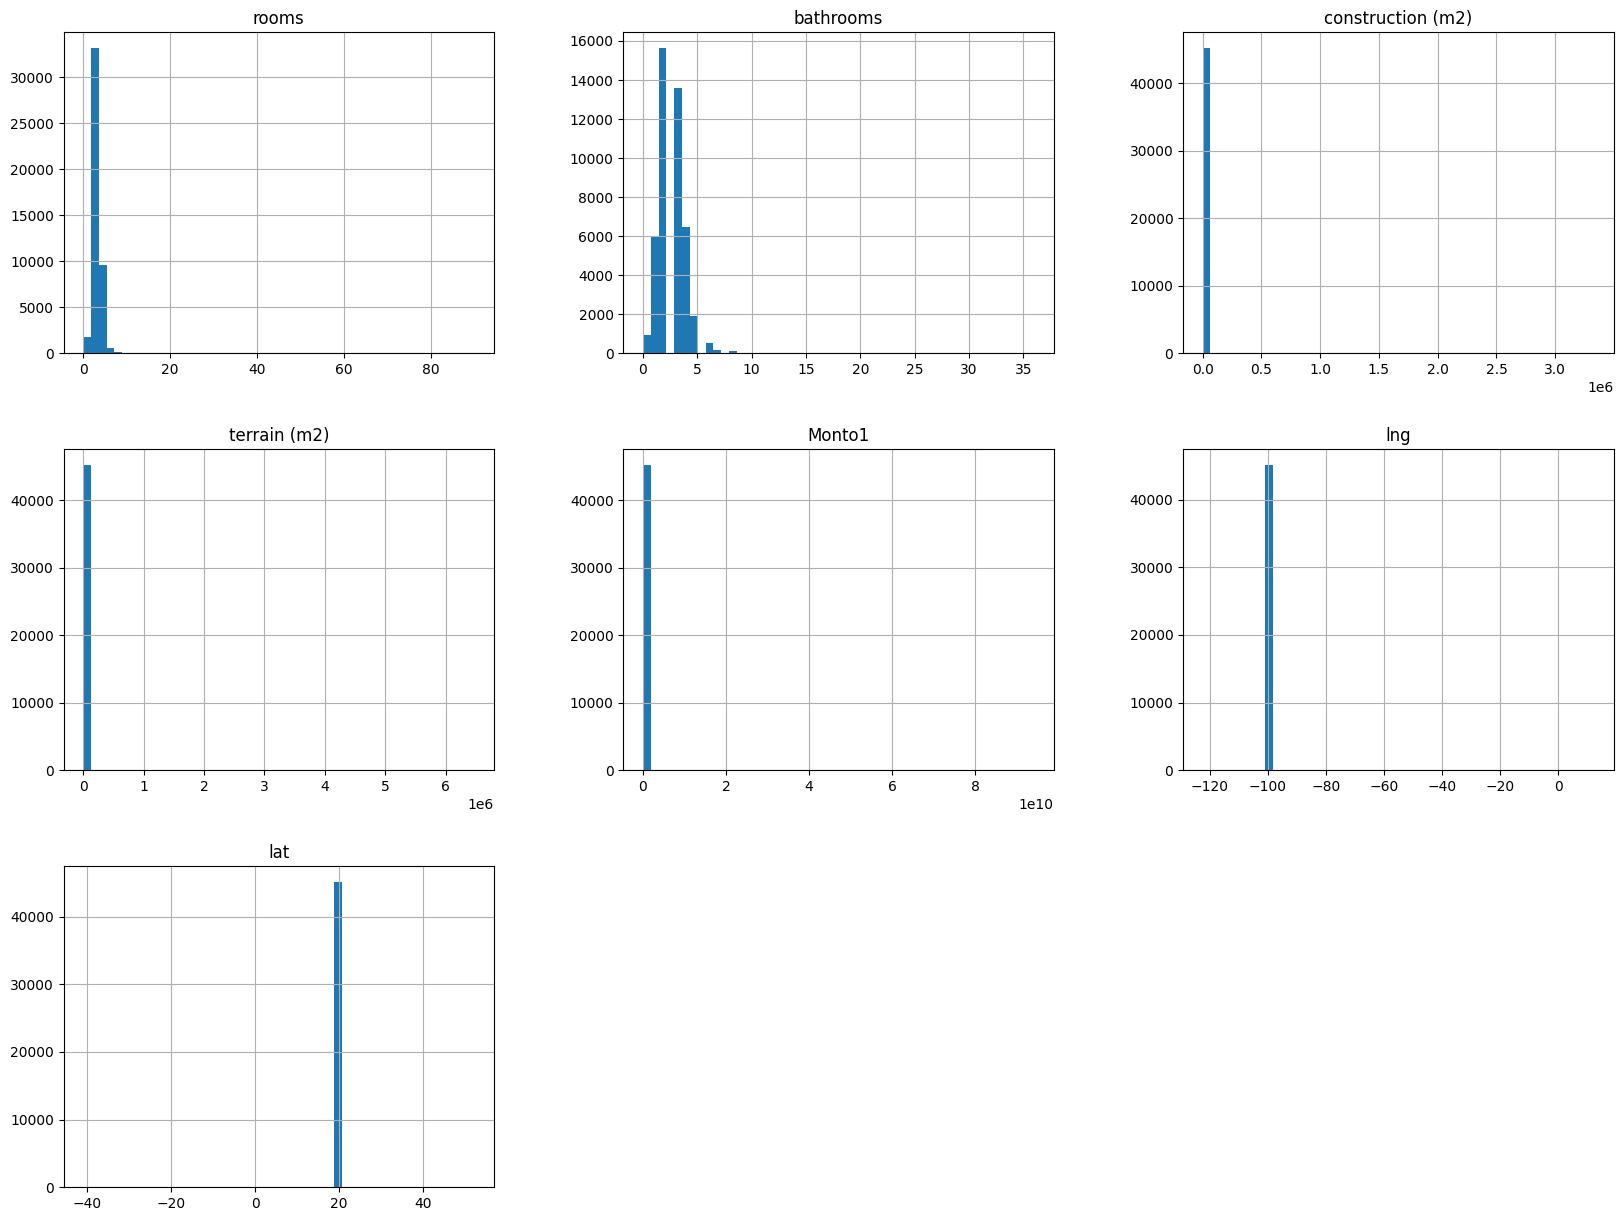

In [7]:
# Creamos un histograma:

#
Venta[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
       'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

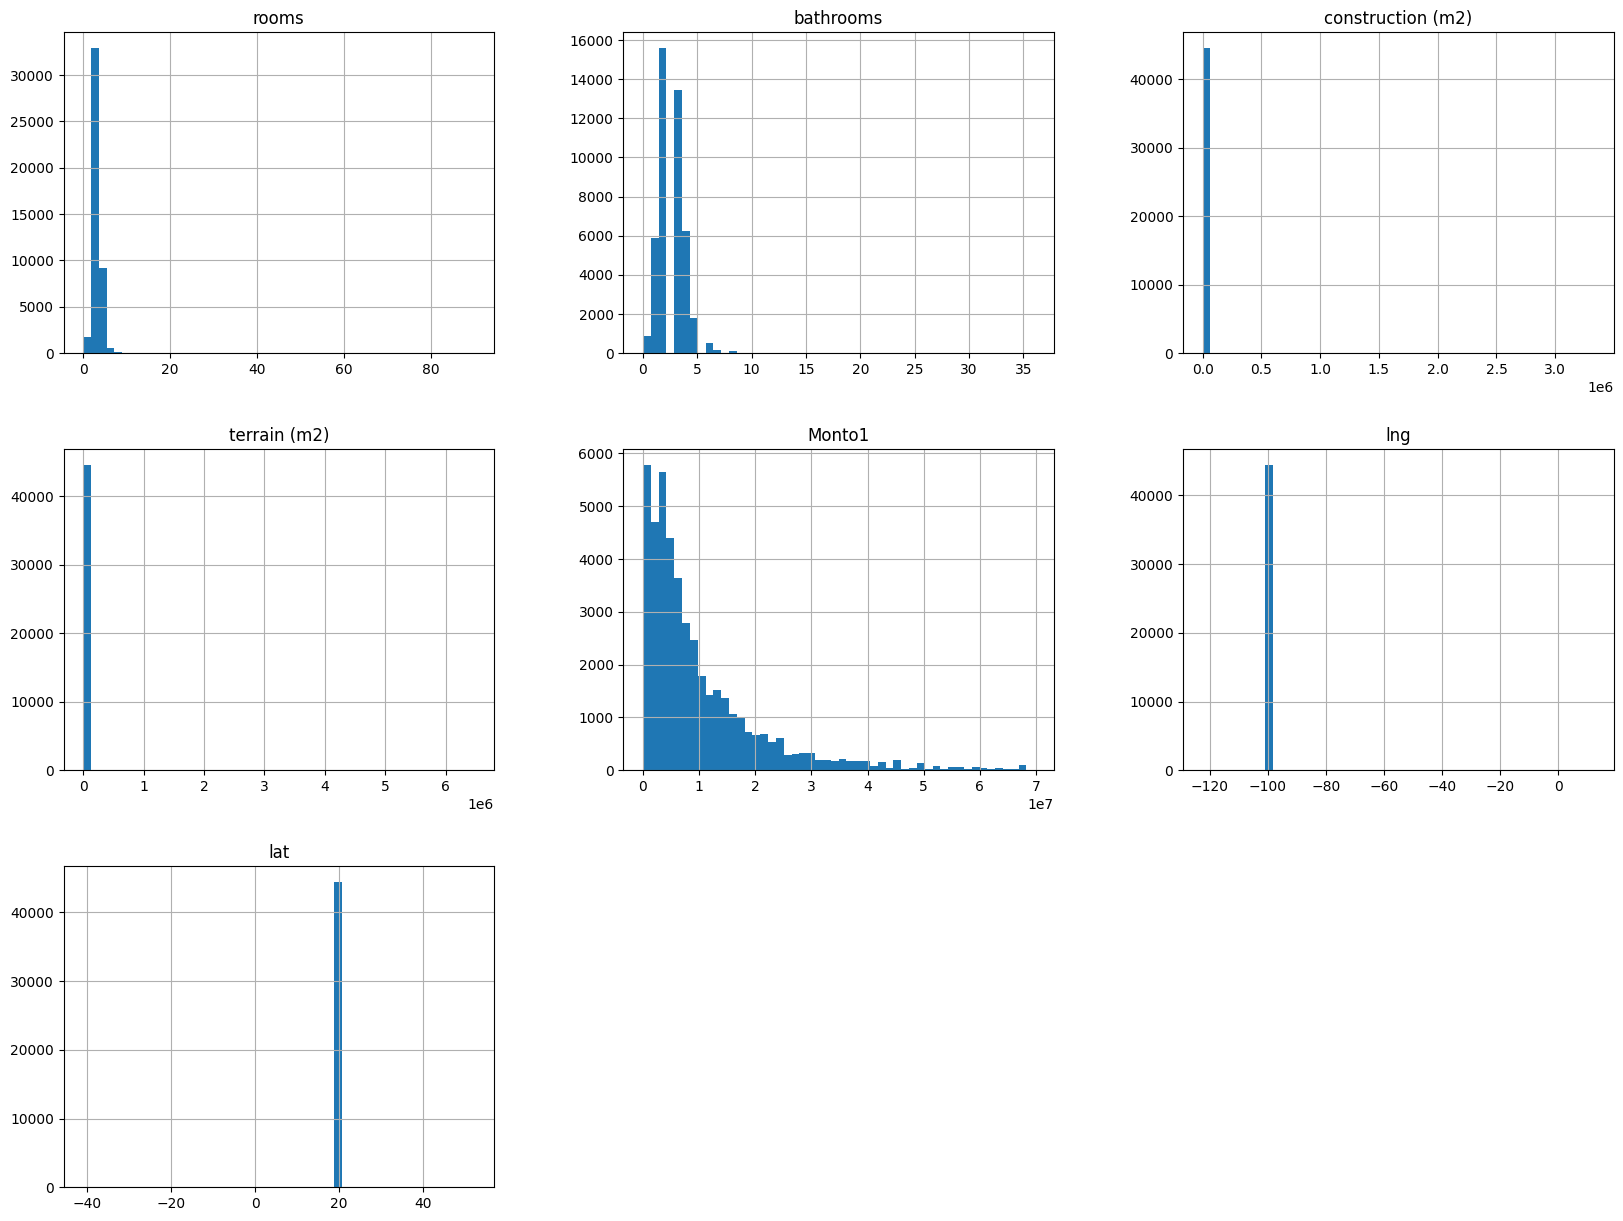

In [8]:
#

Venta_sel = Venta[(Venta['Monto1'] > 1000) & (Venta['Monto1'] < 70000000)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

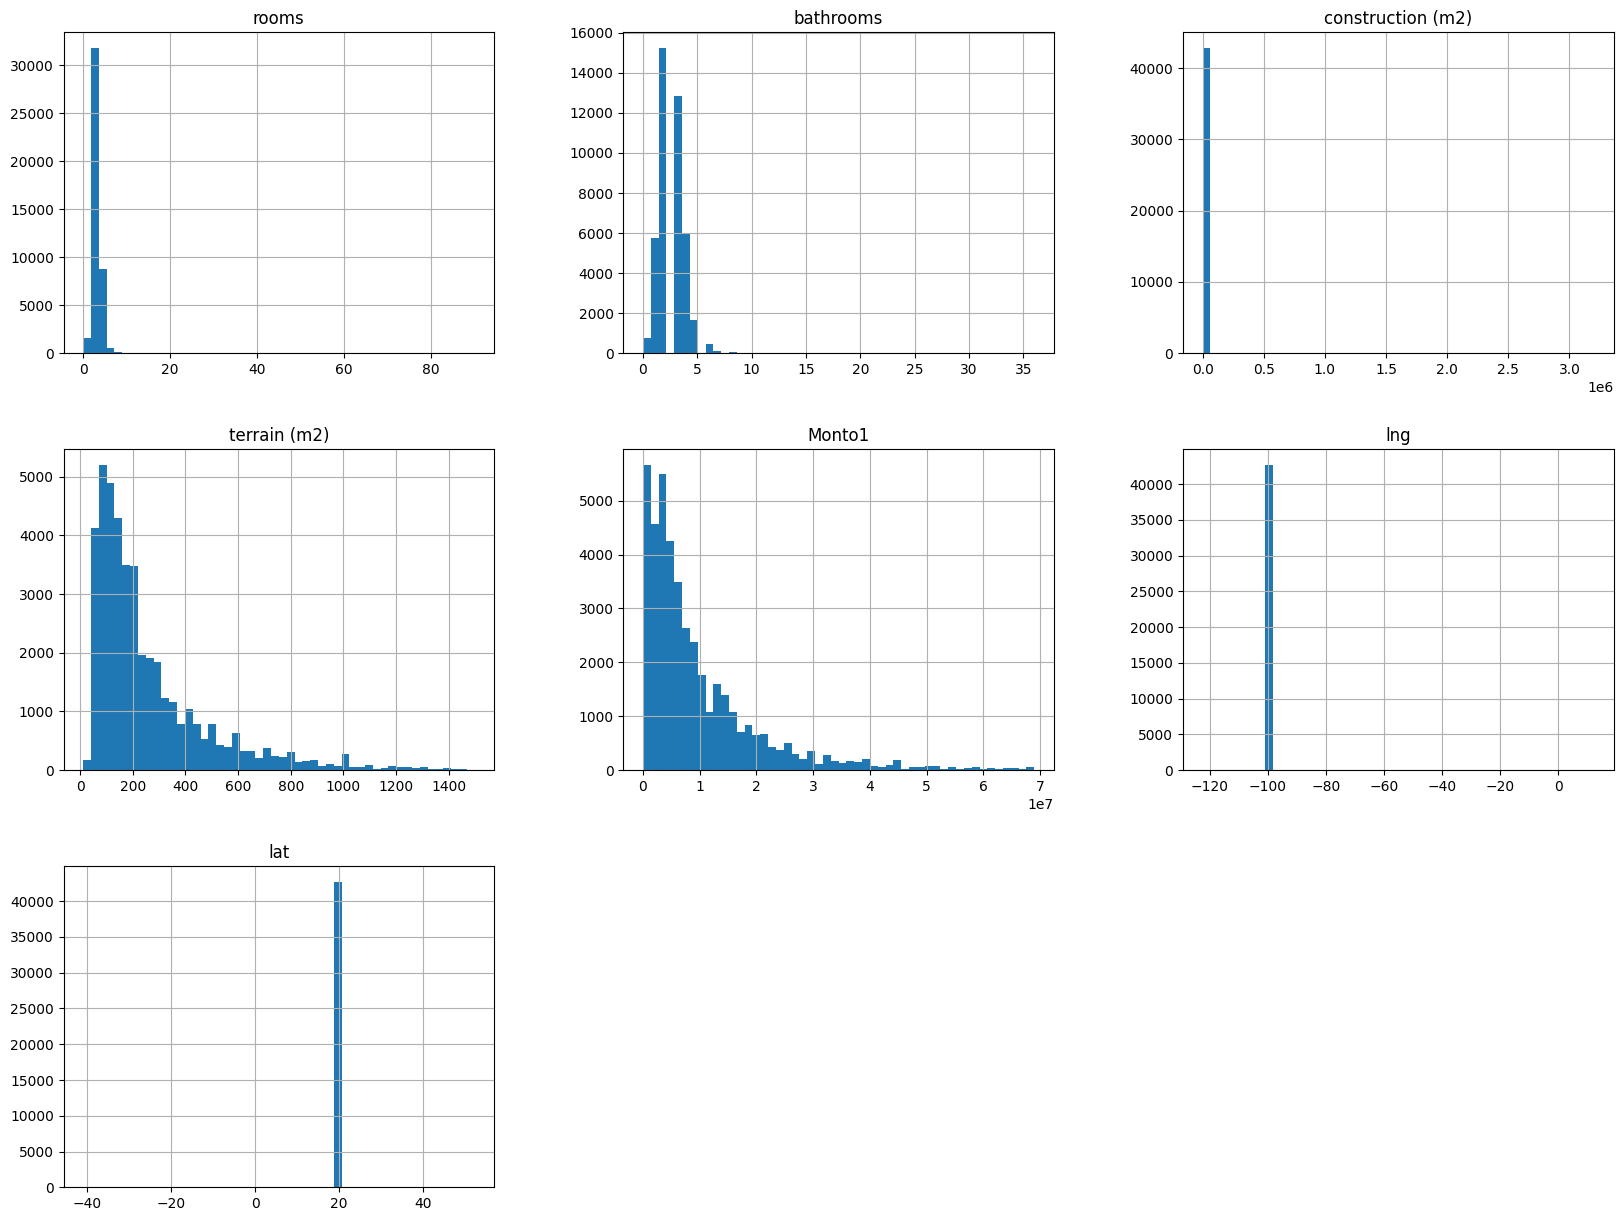

In [9]:
#

Venta_sel = Venta_sel[(Venta_sel['terrain (m2)'] > 10) & (Venta_sel['terrain (m2)'] < 1500)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

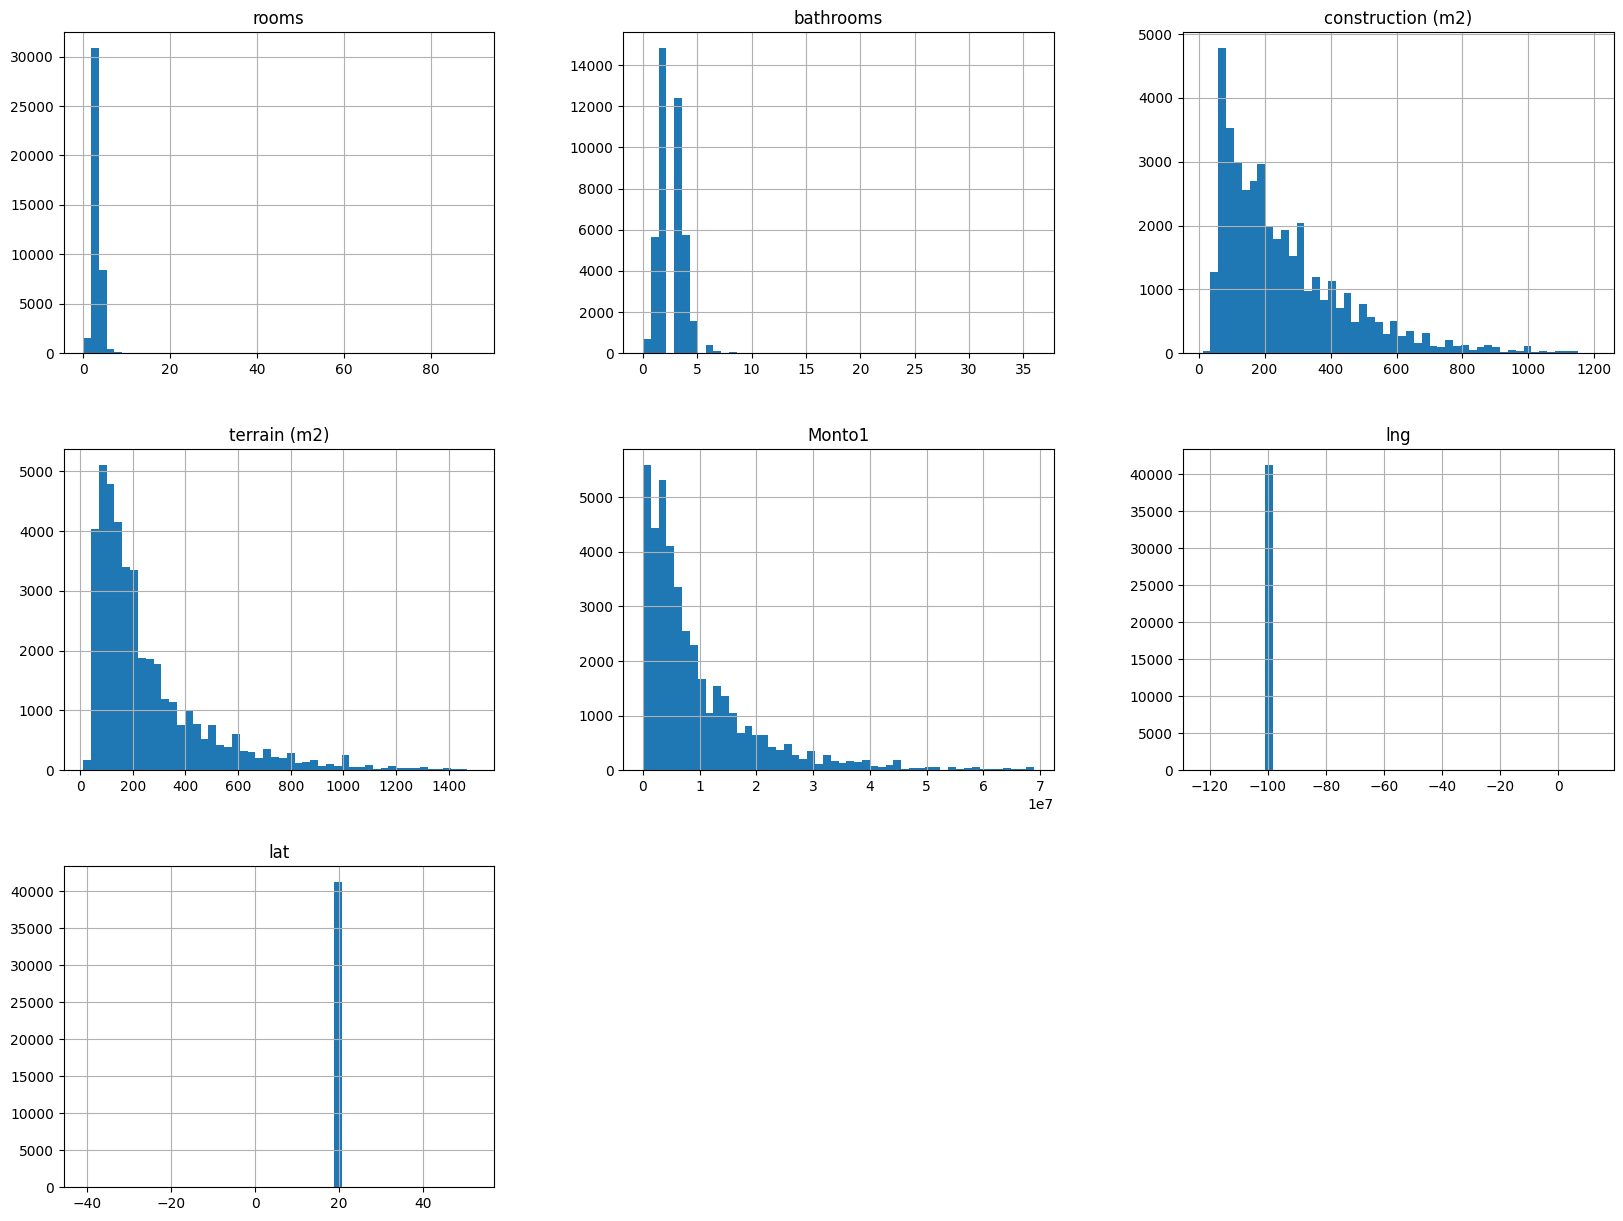

In [10]:
#

Venta_sel = Venta_sel[(Venta_sel['construction (m2)'] > 10) & (Venta_sel['construction (m2)'] < 1200)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

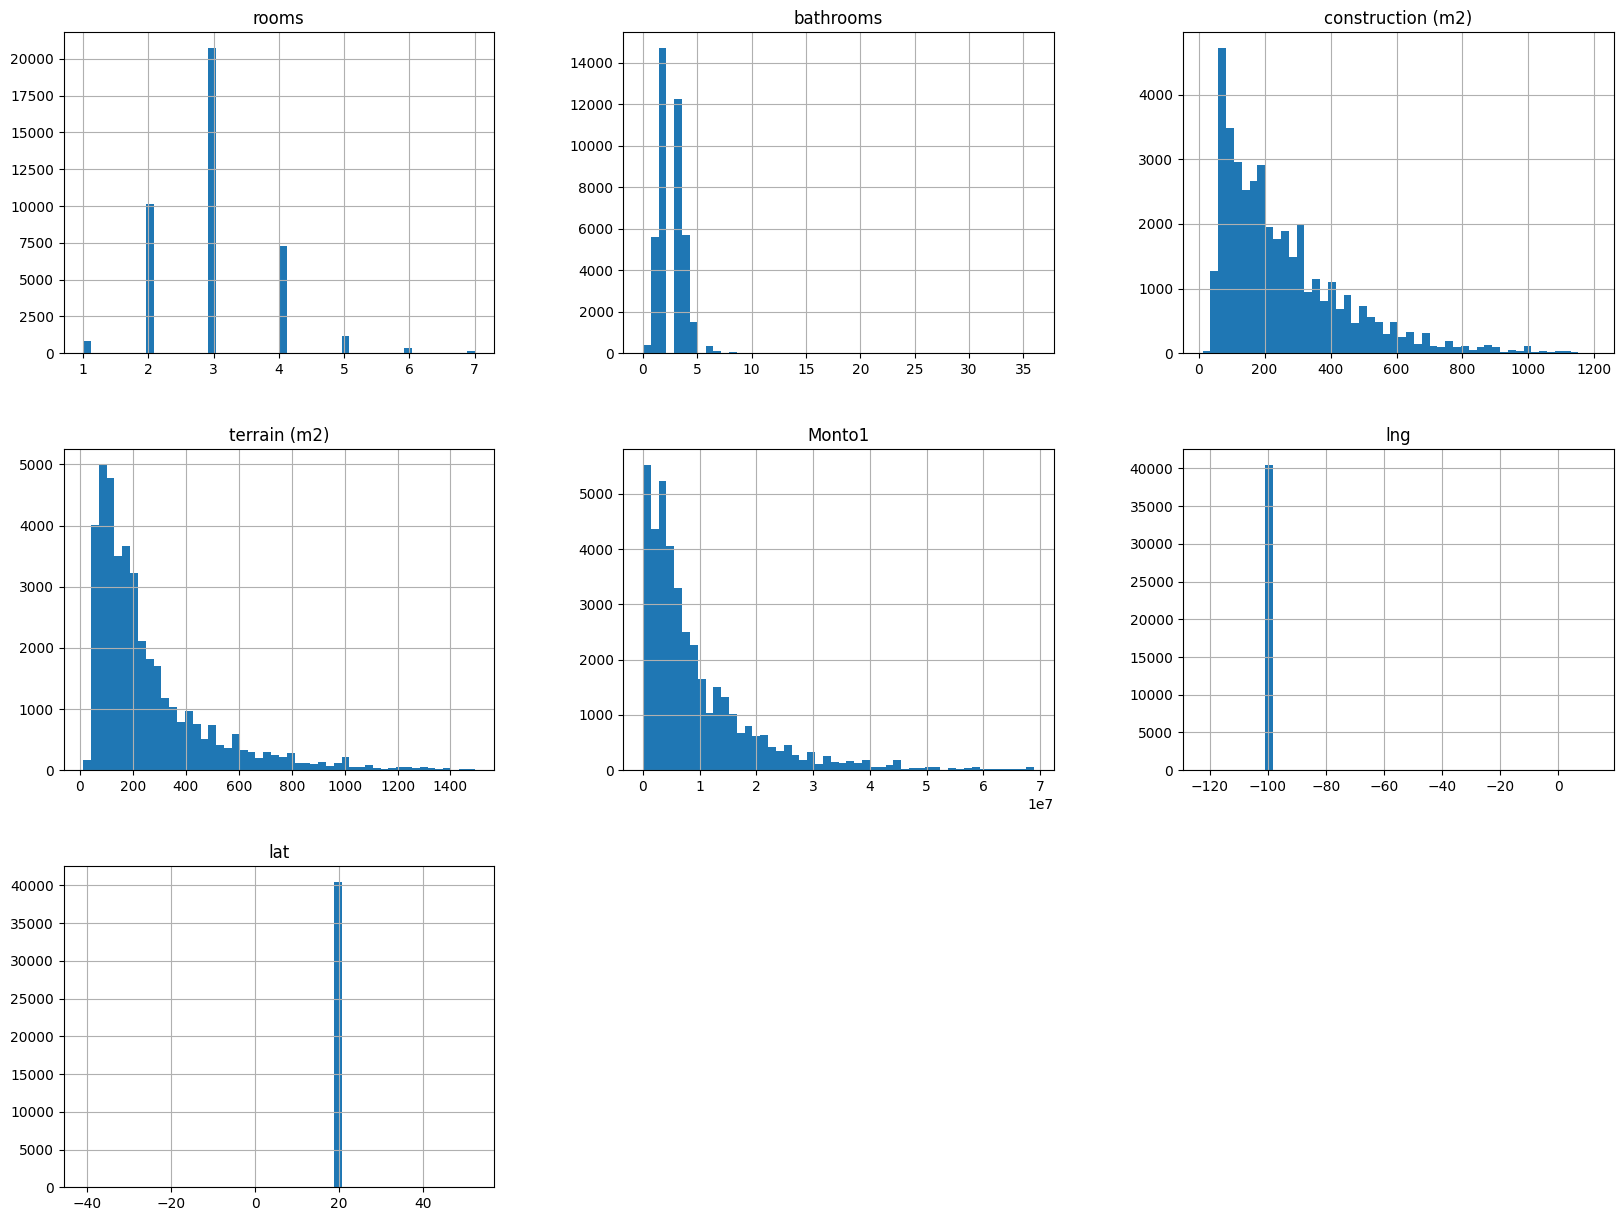

In [11]:
#

Venta_sel = Venta_sel[(Venta_sel['rooms'] > 0) & (Venta_sel['rooms'] < 8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

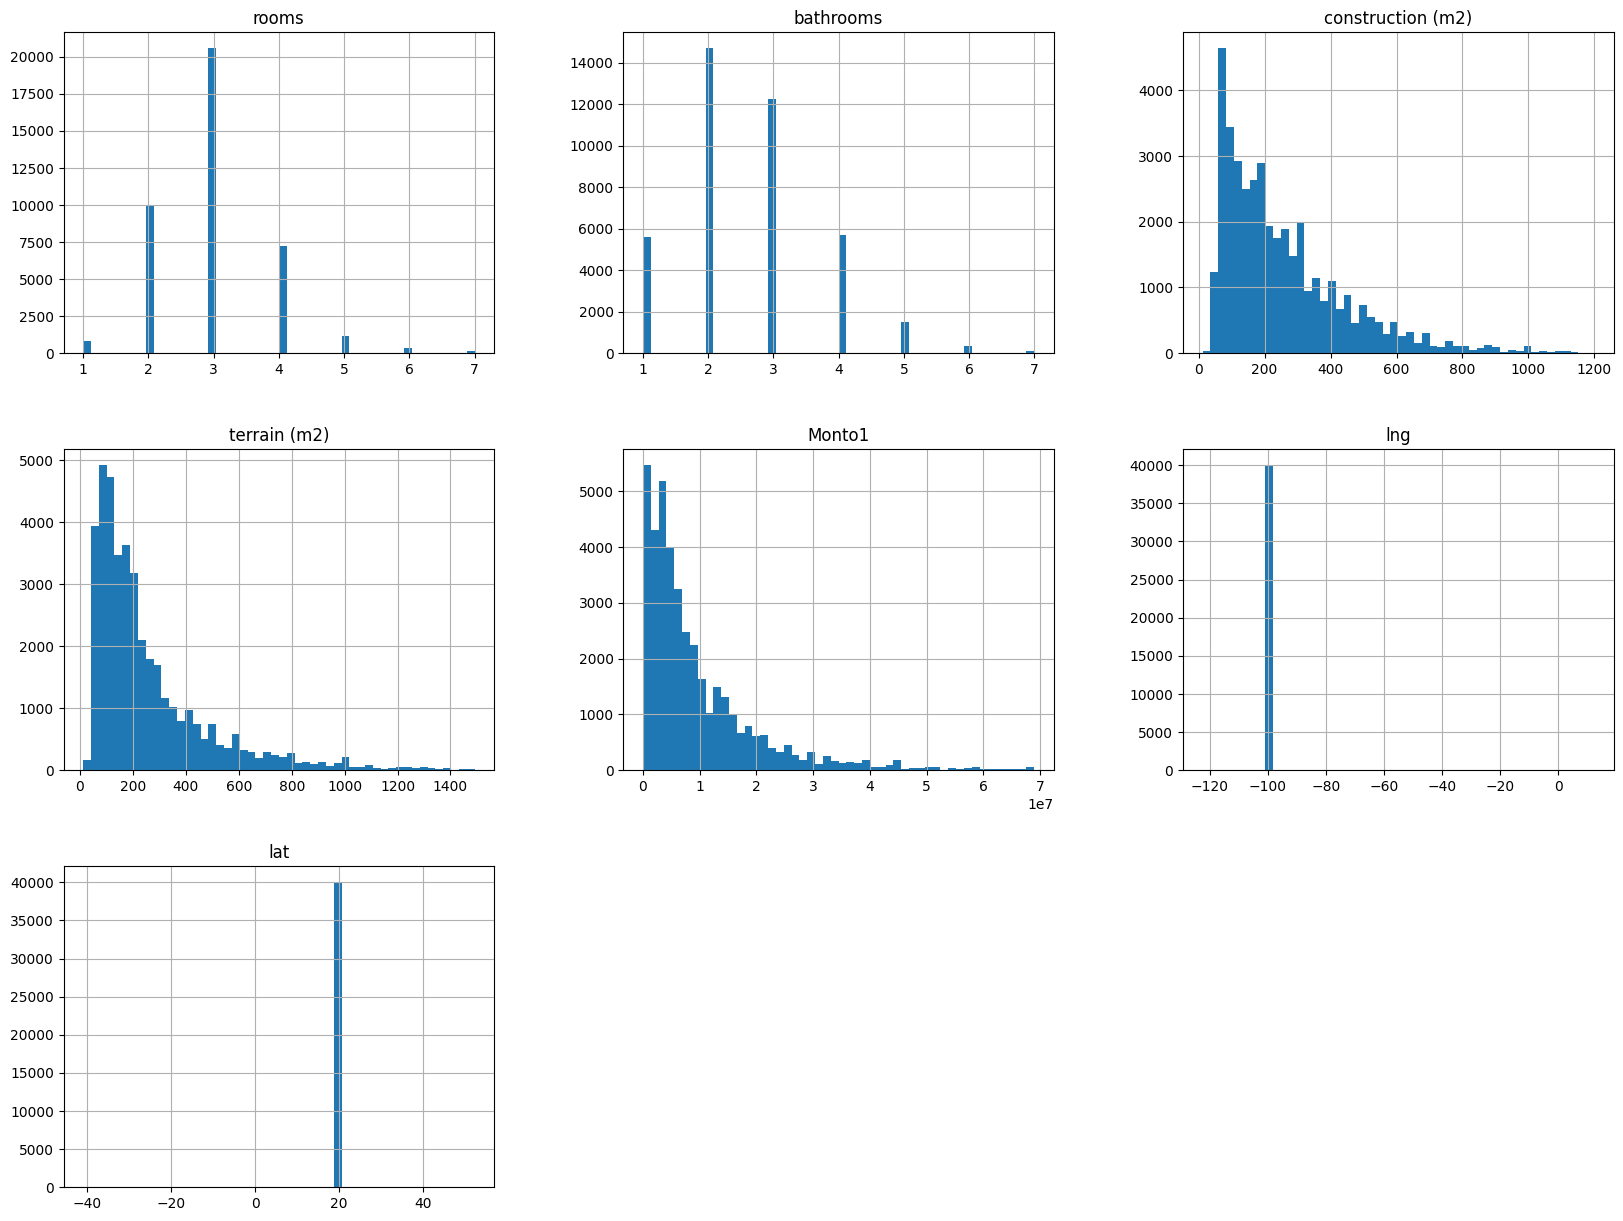

In [12]:
#

Venta_sel = Venta_sel[ (Venta_sel['bathrooms'] > 0) & (Venta_sel['bathrooms'] < 8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

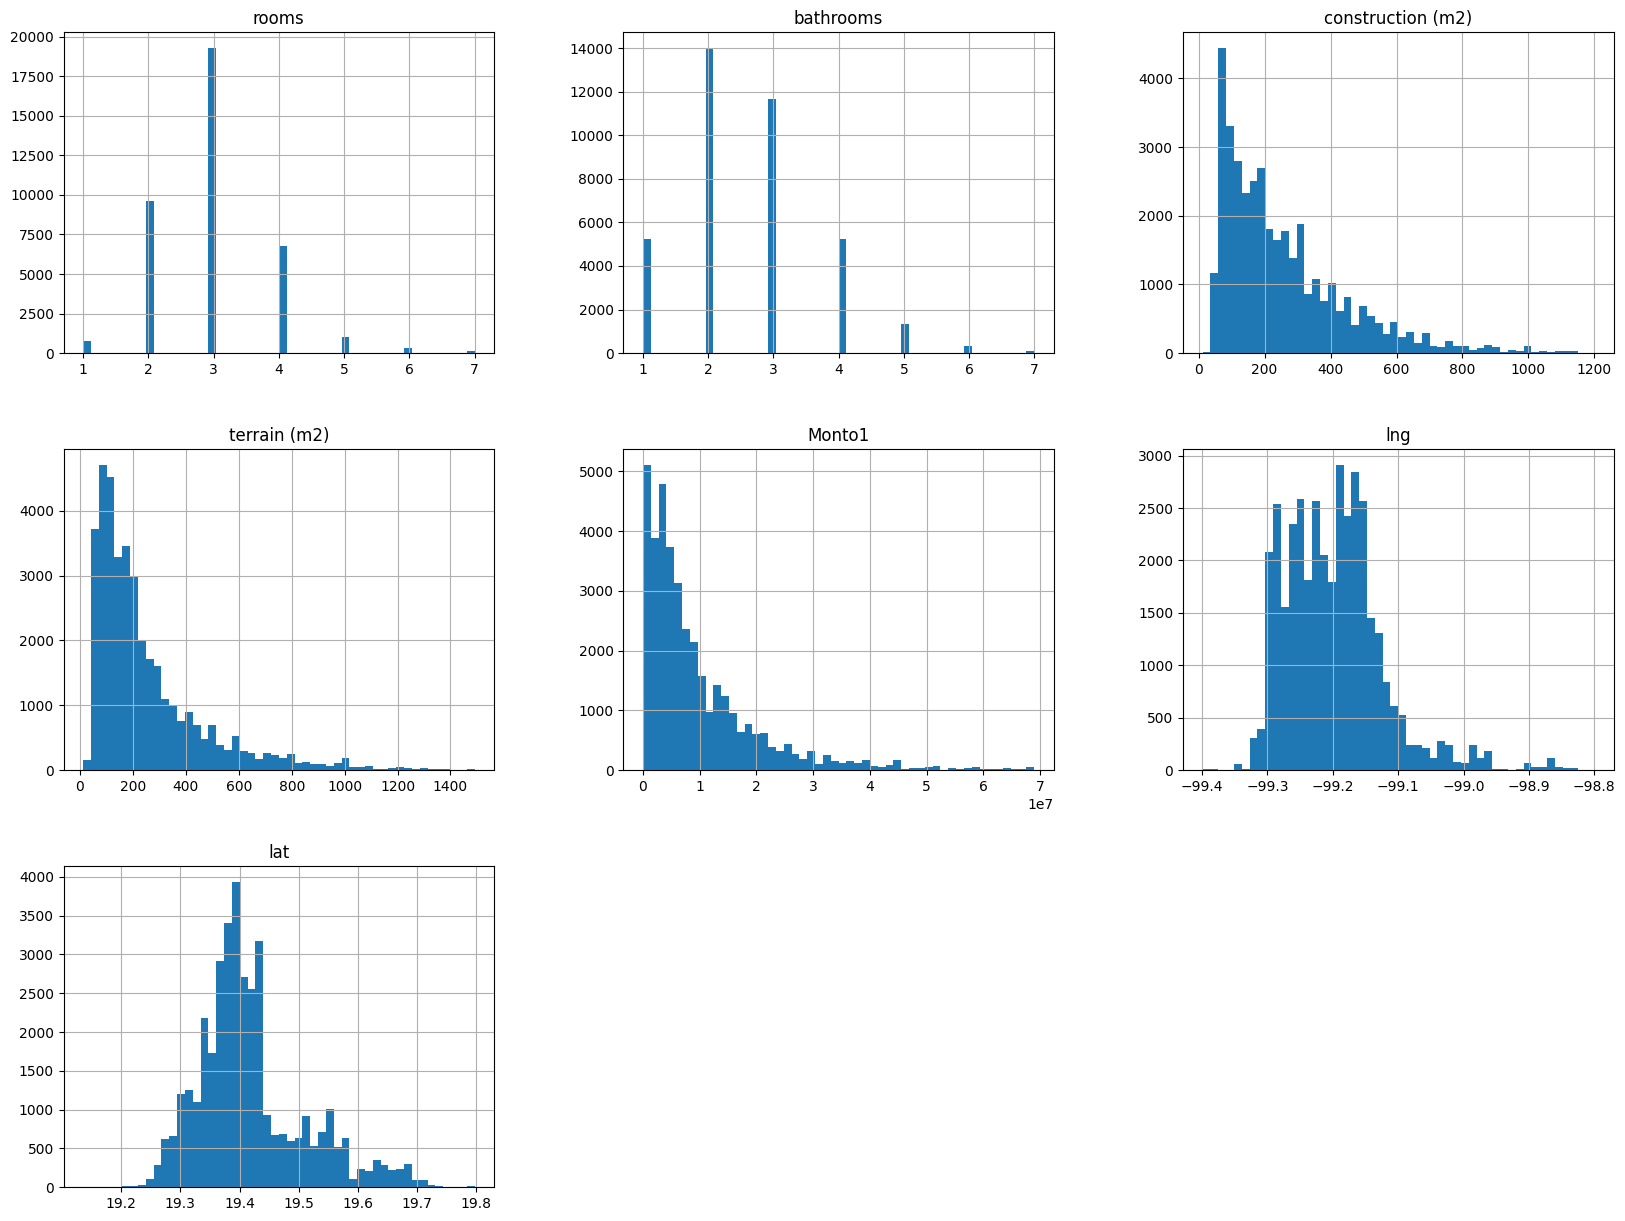

In [13]:
#

Venta_sel = Venta_sel[(Venta_sel['lat'] > 19.1) & (Venta_sel['lat'] < 19.8) & \
                      (Venta_sel['lng'] > - 99.4) & (Venta_sel['lng'] < - 98.8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng',
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

### En suma:

In [14]:
#

Venta_sel = Venta[ ( (Venta['Monto1'] > 1000) & (Venta['Monto1'] < 70000000) ) & \
                   ( (Venta_sel['terrain (m2)'] > 10) & (Venta_sel['terrain (m2)'] < 1500) ) & \
                   ( (Venta_sel['construction (m2)'] > 10) & (Venta_sel['construction (m2)'] < 1200) ) & \
                   ( (Venta_sel['rooms'] > 0) & (Venta_sel['rooms'] < 8) ) & \
                   ( (Venta_sel['bathrooms'] > 0 ) & (Venta_sel['bathrooms'] < 8) )& \
                   ( (Venta_sel['lat'] > 19.1) & (Venta_sel['lat'] < 19.8) ) & \
                   ( (Venta_sel['lng'] > - 99.4) & (Venta_sel['lng'] < - 98.8) ) ]

In [15]:
#

Venta.shape, Venta_sel.shape

((45324, 24), (37948, 24))

In [16]:
#

Venta_sel['Price_m2'] = Venta_sel['Monto1'] / Venta_sel['construction (m2)']

## Visualización

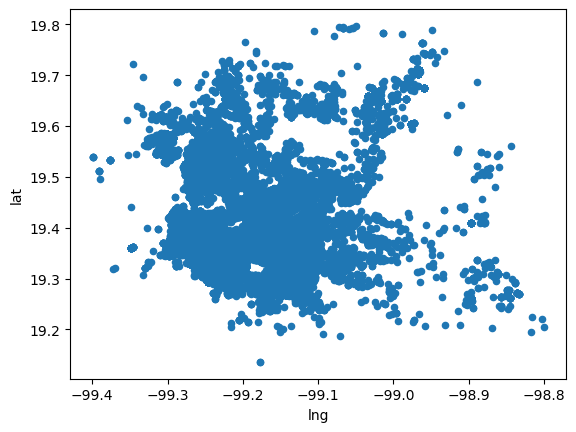

In [17]:
#

Venta_sel.plot(kind = 'scatter', x = 'lng', y = 'lat')

plt.show()

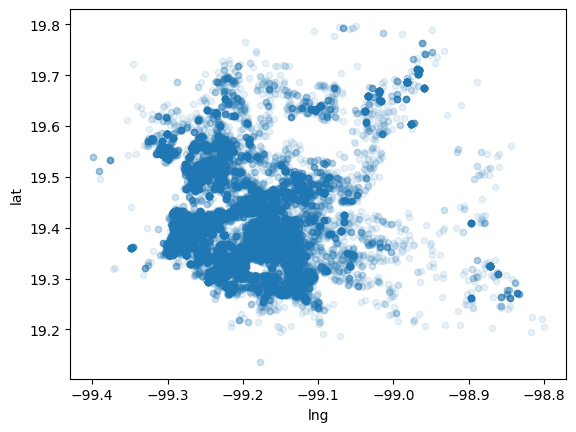

In [18]:
#

Venta_sel.plot(kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.1)

plt.show()

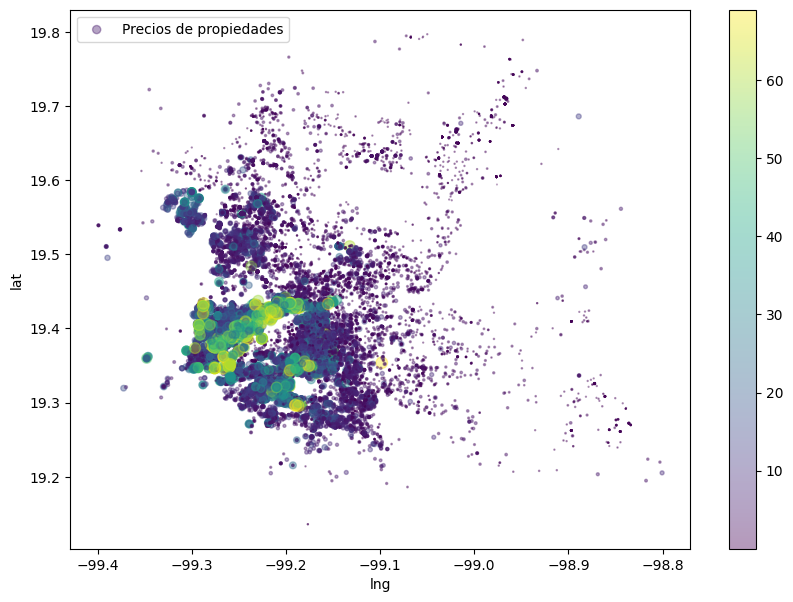

In [19]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['Monto1']/1000000, label = "Precios de propiedades",
                figsize = (10, 7),
                c = Venta_sel['Monto1']/1000000,  colorbar = True)

plt.legend()

plt.show()

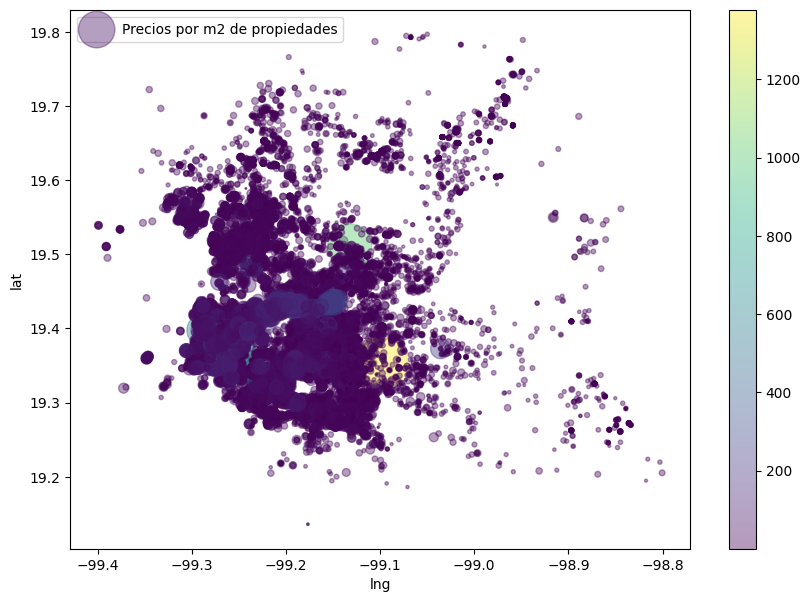

In [20]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['Price_m2']/1000, label = "Precios por m2 de propiedades",
                figsize = (10, 7),
                c = Venta_sel['Price_m2']/1000,  colorbar = True)

plt.legend()

plt.show()

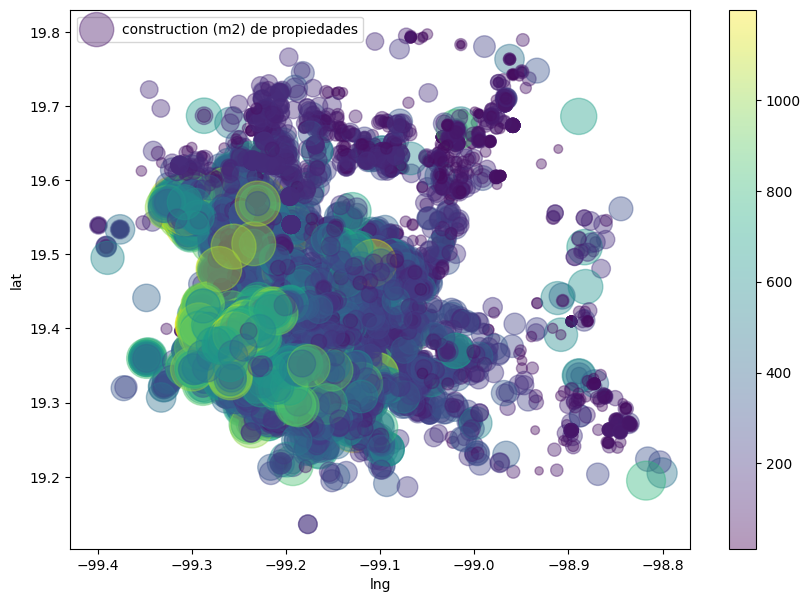

In [21]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['construction (m2)'], label = "construction (m2) de propiedades",
                figsize = (10, 7),
                c = Venta_sel['construction (m2)'],  colorbar = True)

plt.legend()

plt.show()

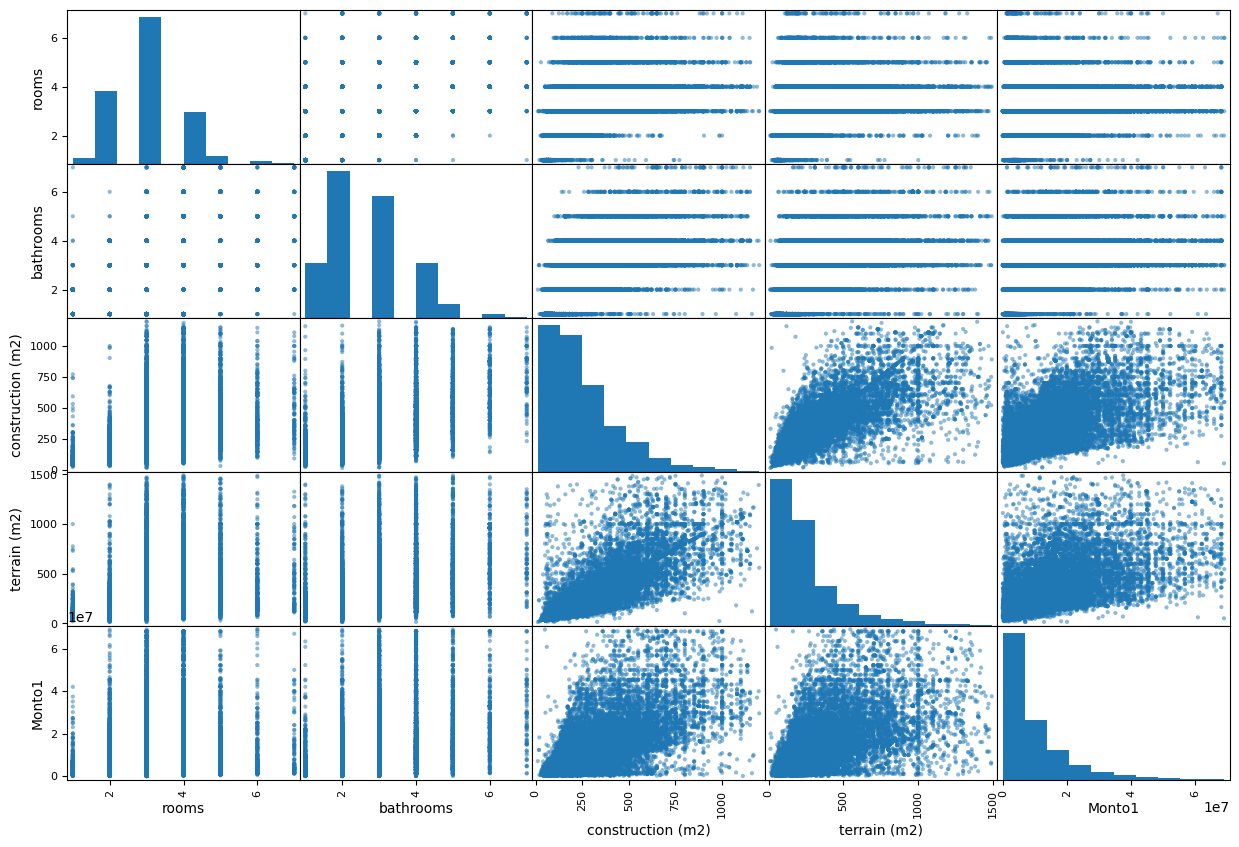

In [22]:
#
attributes = ['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1']

scatter_matrix(Venta_sel[attributes], figsize = (15, 10))

plt.show()

In [23]:
# Save

Venta_sel.to_csv('Venta_sel.csv', sep =',', encoding = 'utf-8-sig', index = False)

## El Modelo

In [24]:
#

Venta_sel['construction'] = Venta_sel['construction (m2)']
Venta_sel['terrain'] = Venta_sel['terrain (m2)']

# Formulamos la regresión

formula = 'Monto1 ~ rooms + bathrooms + construction + terrain + lat + lng'

results = ols(formula, Venta_sel).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Monto1   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     8019.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:21:19   Log-Likelihood:            -6.5228e+05
No. Observations:               37948   AIC:                         1.305e+06
Df Residuals:                   37941   BIC:                         1.305e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.908e+08   5.38e+07     -7.260   

In [27]:
# Formulamos la regresión

formula = 'Price_m2 ~ rooms + bathrooms + construction + terrain + lat + lng'

results = ols(formula, Venta_sel).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Price_m2   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1141.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:22:49   Log-Likelihood:            -4.4033e+05
No. Observations:               37948   AIC:                         8.807e+05
Df Residuals:                   37941   BIC:                         8.807e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.319e+06   2.02e+05    -21.382   